In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve, auc, roc_curve
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Cleaned-Data.csv', nrows=50000)
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


In [ ]:
dataset.shape

(50000, 27)

In [ ]:
feature_columns = ['Fever', 'Tiredness', 'Pains','Dry-Cough']
X = data[feature_columns]
y = data['Age_60+']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     13041
           1       0.00      0.00      0.00      1959

    accuracy                           0.87     15000
   macro avg       0.43      0.50      0.47     15000
weighted avg       0.76      0.87      0.81     15000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,predictions))

[[13041     0]
 [ 1959     0]]


In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(dataset.drop('Country', axis=1).columns[1:])
features

['Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Severity_Mild',
 'Severity_Moderate',
 'Severity_None',
 'Severity_Severe',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes']

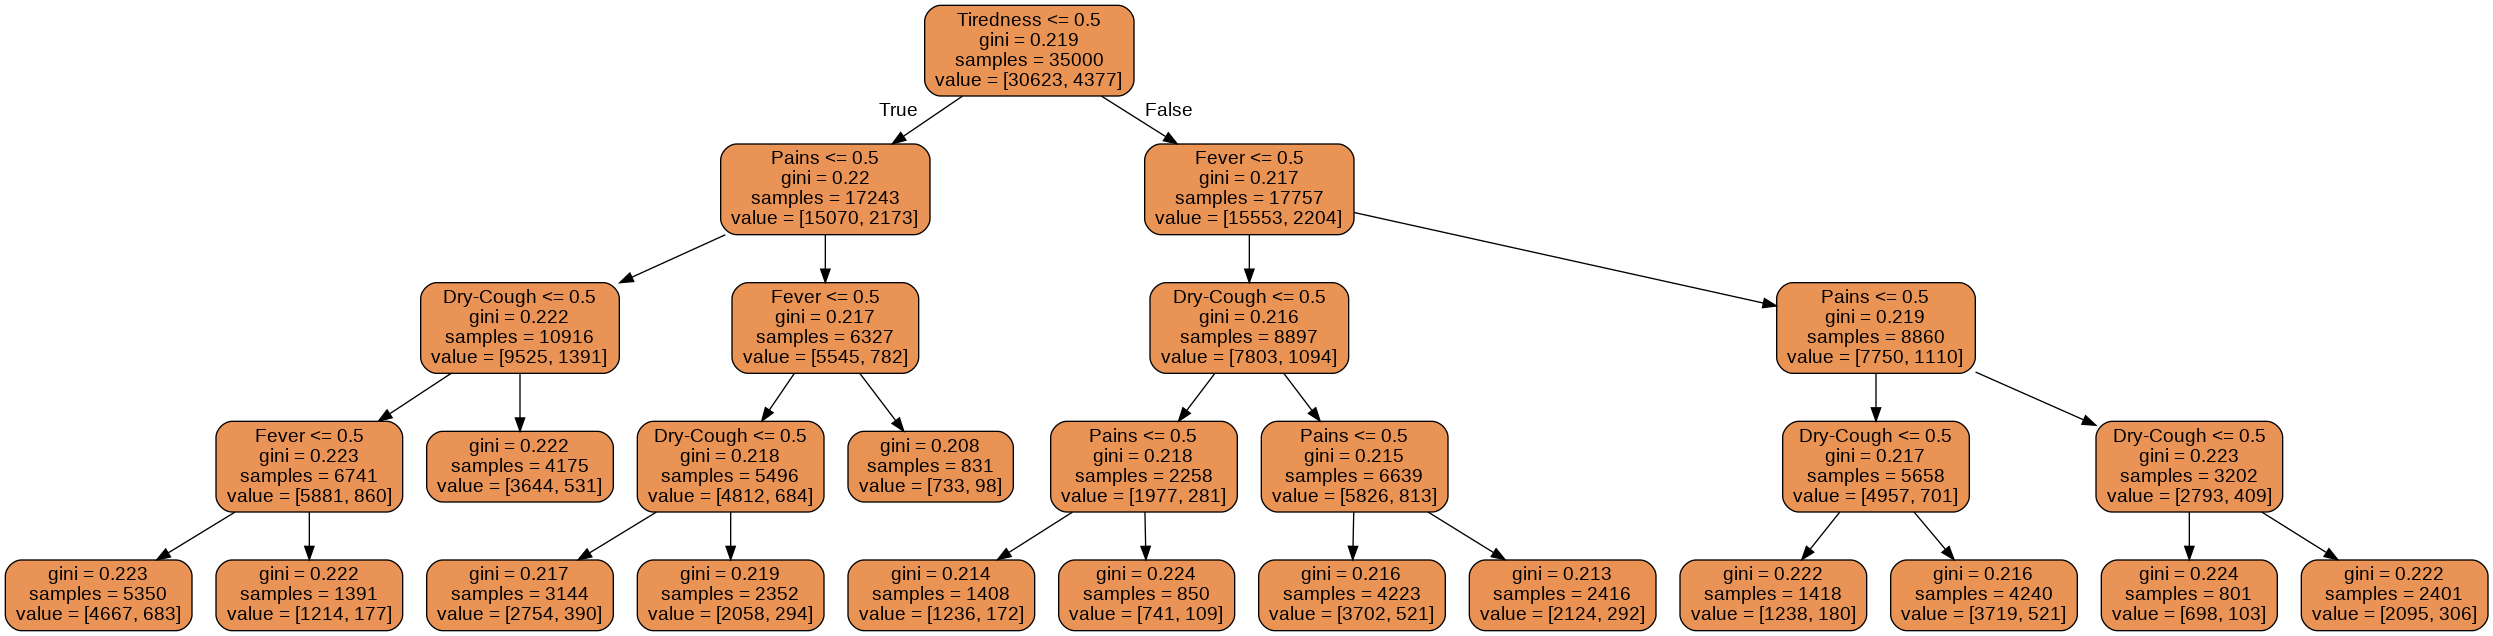

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_columns ,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

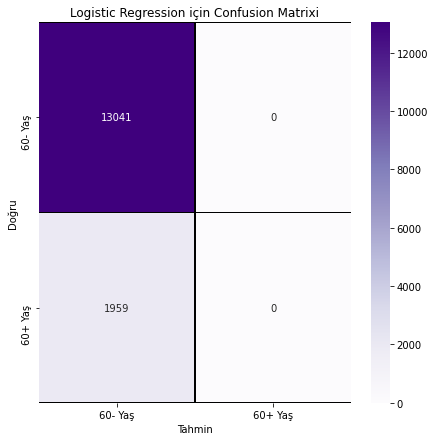

In [ ]:
cm = confusion_matrix(y_test, predictions)
x_axis_labels = ["60- Yaş", "60+ Yaş"]
y_axis_labels = ["60- Yaş", "60+ Yaş"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Decision Tree için Confusion Matrixi')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

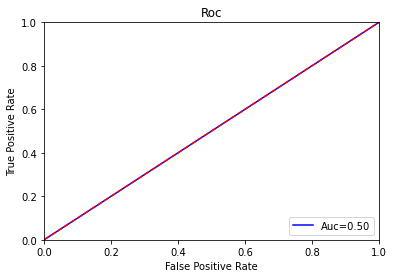

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(y_test, predictions)
roc_auc=metrics.auc(fpr,tpr)
plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()